In [5]:
import torch
import numpy as np
#modulo de redes neuronales
import torch.nn as nn
#modulo de optimizaciones
import torch.optim as optim
#biblioteca de ayuda para graficar
import matplotlib.pyplot as plt

# Regresión lineal


---

---





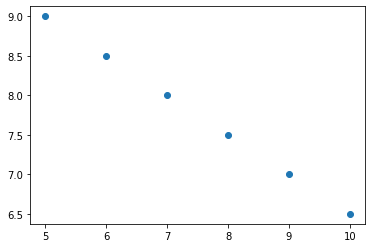

In [6]:
precios_carros = [5,6,7,8,9,10]
unidades_vendidas = [9,8.5,8,7.5,7,6.5]

#plt.scatter --> graficar dos datos en una relación matemática
plt.scatter(precios_carros, unidades_vendidas)

In [7]:
# creacion de un array en numpy en base a los datos python
# np.array --> creacion de un array en np
# .reshape le da un redimentacion a los datos
precios_array = np.array(precios_carros).reshape(-1,1)
unidades_array = np.array(unidades_vendidas).reshape(-1,1)
precios_array, unidades_array

(array([[ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]), array([[9. ],
        [8.5],
        [8. ],
        [7.5],
        [7. ],
        [6.5]]))

In [8]:
# .requires_grad_ --> activar los gradientes en este tensor (unidades no lo necesita porque intentamos predecir) )
# si una propiedad termina en '_' significa que va a cambiar alguna propiedad del tensor
precios = torch.from_numpy(precios_array).float().requires_grad_(True)
unidades = torch.from_numpy(unidades_array).float()
precios,precios.shape

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), torch.Size([6, 1]))

0.0011129028862342238


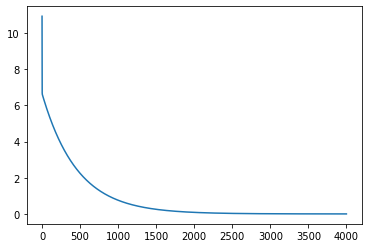

In [21]:
# nn.linear -->define el tipo de modelo que vamos a crear como lineal y la dimension tanto de  entrada como de salida
model = nn.Linear(1,1)

# nn.MSELoss --> define el calculo  de la perdida que se va a usar la media del cuadrado de los errores
loss_function = nn.MSELoss()
# optim.SGD() --> llama al modo de optimizacion Stocastic Gradient Decent
# dentro del SGD se define el batch para el entrenamiento
# lr --> learning rate
optimizer = optim.SGD(model.parameters(),lr=0.0112)

# definimos el espacio donde se guardara losses y el numero de iteraciones
losses = []
iterations = 4000

for i in range(iterations):
  # alimento el modelo con los lebels (precios)
  pred = model(precios)
  # loss_funtion --> comparacion en cual es la prediccion y cual es el dato real
  loss = loss_function(pred,unidades)
  # .append --> agrega datos al array en este caso los obtenidos en ese momento
  losses.append(loss.data)
  # .zero_grad --> reinicia los gradientes a cero ya que estos se acumulan.
  optimizer.zero_grad()
  # .backward --> parte del training loop
  loss.backward()
  # .step --> nos da un poco de movimiento en direccion al minimo.
  optimizer.step()

# imprimo el ultimo valor de loss
print(float(loss))
# range(iterations) --> imprimo el numero de iteraciones en el eje x, y losses en el eje y
plt.plot(range(iterations), losses)


In [10]:
# Comprobacion de la prediccion, entre un valor de un precio y compruebo el modelo.
x = torch.Tensor([[4.0]])
p = model(x)
p

tensor([[9.4225]], grad_fn=<AddmmBackward>)

# Regresión logistica

---

---





In [11]:
# definimos un grupo de datos en este caso 100
n = 100

# se utiliza doble // porque son enteros /--> flotantes
# vamos a dividir en la mitad de los datos en la parte alta de la grafica y la otra mitad en la parte baja
h = n//2

# definimos una dimension en este caso 2 por ser par
dimen = 2

# generamos un arreglo random de tamaño N con la dimension data
# multiplicamos por 3 para centrar los datos en -3 y +3
data = np.random.rand(n,dimen)*10
data

array([[4.84592485e+00, 8.64195082e-02],
       [2.94036187e+00, 6.57969442e+00],
       [9.65671926e+00, 6.63887502e+00],
       [8.89418775e+00, 5.00801552e-01],
       [4.75964264e+00, 6.09121320e-01],
       [2.98197910e+00, 8.59520816e+00],
       [9.27565018e+00, 4.41582465e-01],
       [5.77984586e-01, 3.70268624e+00],
       [8.53895950e+00, 2.69325840e+00],
       [9.49111066e+00, 5.02671561e+00],
       [3.49035701e+00, 5.75229236e+00],
       [9.41470871e+00, 6.49278292e+00],
       [4.62615434e+00, 5.05776805e+00],
       [6.16067162e+00, 9.45546644e+00],
       [1.43623828e-01, 2.18273391e+00],
       [8.29578893e+00, 2.12682306e-01],
       [7.56850717e+00, 4.21884861e+00],
       [6.04114095e+00, 8.45878290e+00],
       [6.19024876e+00, 6.02023155e+00],
       [7.40252773e+00, 9.06688911e+00],
       [3.02550705e+00, 8.24705995e+00],
       [5.38293660e-01, 7.90647505e-01],
       [6.11859925e+00, 2.76916431e+00],
       [5.42736645e+00, 8.97415334e+00],
       [9.239679

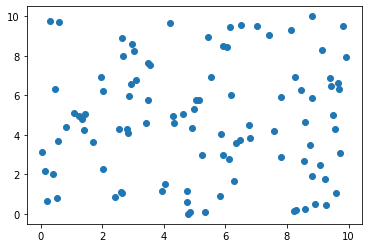

In [12]:
# graficamos usando .scatter y definimos a la mitad para x ; la otra mitad para y
plt.scatter(data[:,0],data[:,1])

In [13]:
# asignamos los valores 0 y 1 a los grupos para poder predecir el grupo donde se encuentra
data[:h,:] = data[:h,:] - 5*np.ones((h,dimen))

In [14]:
# se utiliza la ubicacion de h: y :h para especificar las dos mitades en la misma data
data[h:,:] = data[h:,:] + 5*np.ones((h,dimen))

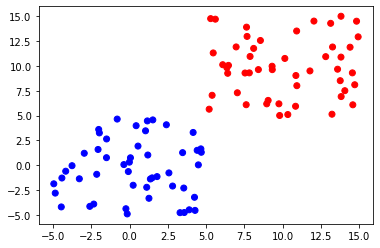

In [15]:
# volvemos a graficar donde se ve cada nube y agregamos colores
# definimos colores en este caso azul y rojo
colors = ['blue','red']

# llamamos al array y les asignamos a cada mitad un color [0]--> azul; [1]--> rojo
# .reshape --> redimenciona el array en el tamaño de (n)
color = np.array([colors[0]]*h+[colors[1]]*h).reshape(n)

# imprimimos y agregamos al color como una variable c=
plt.scatter(data[:,0], data[:,1], c = color)

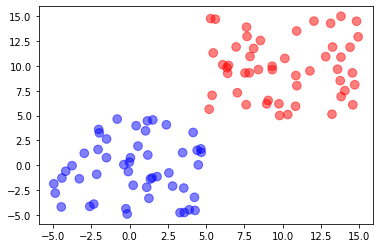

In [16]:
# s--> define al tamaño de cada punto de manera porcentual 75-->75%
# alpha --> transparencia de cada punto
plt.scatter(data[:,0], data[:,1],c = color, s=75, alpha=0.5)

In [17]:
# creacion del tarjet --> es a donde se van a dirigir las predicciones una vez se hagan
target = np.array ([0]*h+ [1]*h).reshape(n,1)

# variable de entrada
x= torch.from_numpy(data).float().requires_grad_(True)
# variable de salida
y= torch.from_numpy(target).float()

x.shape,y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

tensor(0.0509, grad_fn=<BinaryCrossEntropyBackward>)

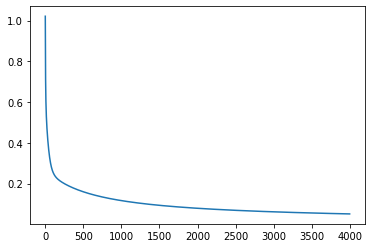

In [18]:
''' Creacion del modelo '''
# nn.Sequiential --> nos permite combinar dos funciones de pytorch
# nn.Sigmoid --> nos ayuda para la creacion de probabilidades
# es importante el identado!!
model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)

# nn.BCELoss() --> Bynary Cross Entropy para el calculo de Loss Function
loss_function = nn.BCELoss()

#Seguimos usando Gradient para optimizar el modelo.
optimizer = optim.SGD(model.parameters(),lr=0.015)

losses = []
iterations = 4000

for i in range(iterations):
  result = model(x)
  loss = loss_function(result,y)
  losses.append(loss.data)
  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

plt.plot(range(iterations),losses)
loss

In [19]:
''' Comprobación '''
# creamos un tensor con un punto en especifico que seria azul
blue = torch.Tensor([[0,0]])
# alimentamos el modelo con el tensor
prediction = model(blue)

# el dato que nos entrega es una probabilidad 0>0.5 --> azul; 0.5=> x>1 -- rojo
print(prediction)

# vamos a buscar la data en forma de tensor y lo comparamos para que en caso de ser mayor a 0.5
# para conocer el valor de un tensor se aplica .data[0][0]
prediction = model(blue).data[0][0]>0.5
print(colors[prediction])

# probamos con un dato que seguro es rojo
red= torch.Tensor([[6,6]])
prediction = model(red)
print(prediction)

prediction = model(red).data[0][0]>0.5
print(colors[prediction])

tensor([[0.0237]], grad_fn=<SigmoidBackward>)
blue
tensor([[0.8306]], grad_fn=<SigmoidBackward>)
red


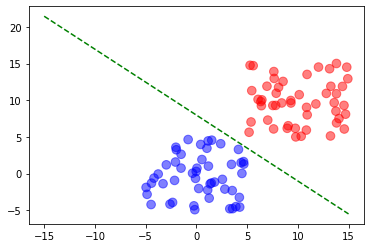

In [20]:
'''CODIGO PARA GRAFICAR'''
# pesos asignados por el modelo colocados en las var w0 y w1
w = list (model.parameters())
w0= w[0].data.numpy()
w1= w[1].data.numpy()

#igual al explicado con anterioridad
plt.scatter(data[:,0],data[:,1], c = color, s=75, alpha=0.5)

#eje x = usa nn.linspace
# nn.linspace --> crea datos de manera igual desde un limite (dato1) a (dato2), definido por (dato3)
x_axis = np.linspace(-15,15,n)

#eje y = pesos que obtuve del modelo + decision boundary
y_axis= -(w1[0]+x_axis*w0[0][0])/w0[0][1]

# 'g--' --> verde se lo puede definir despues del eje x;y
plt.plot(x_axis,y_axis,'g--')